In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_nas = pd.read_csv('NASDAQx.csv', index_col=0)
df_nyse = pd.read_csv('NYSEx.csv', index_col=0)
dfp = pd.read_csv('price_data.csv', index_col=0)

In [7]:
df_nas.head()

,Ticker,Exchange,Name,Sector,Industry
0,AABA,NASDAQ,Altaba Inc,Technology,Edp Services
1,AAL,NASDAQ,American Airlines Group Inc,Transportation,Air Freight Delivery Services
2,AAME,NASDAQ,Atlantic American Corporation,Finance,Life Insurance
3,AAOI,NASDAQ,Applied Optoelectronics Inc,Technology,Semiconductors
4,AAON,NASDAQ,Aaon Inc,Capital Goods,Industrial Machinery Components


In [8]:
df_nas = df_nas.rename(str.lower, axis='columns')
df_nas = df_nas.set_index('ticker')
df_nas

,exchange,name,sector,industry
ticker,,,,
AABA,NASDAQ,Altaba Inc,Technology,Edp Services
AAL,NASDAQ,American Airlines Group Inc,Transportation,Air Freight Delivery Services
AAME,NASDAQ,Atlantic American Corporation,Finance,Life Insurance
AAOI,NASDAQ,Applied Optoelectronics Inc,Technology,Semiconductors
AAON,NASDAQ,Aaon Inc,Capital Goods,Industrial Machinery Components
...,...,...,...,...
ZNWAA,NASDAQ,Zion Oil And Gas Inc,Energy,Oil And Gas Production
ZS,NASDAQ,Zscaler Inc,Technology,Edp Services
ZSAN,NASDAQ,Zosano Pharma Corporation,Health Care,Major Pharmaceuticals


In [9]:
df_nyse.head()

,Ticker,Exchange,Name,Sector,Industry
0,A,NYSE,Agilent Technologies Inc,Capital Goods,Biotechnology Laboratory Analytical Instruments
1,AA,NYSE,Alcoa Corporation,Basic Industries,Aluminum
2,AAC,NYSE,Aac Holdings Inc,Health Care,Medical Specialities
3,AAN,NYSE,Aarons Inc,Technology,Diversified Commercial Services
4,AAP,NYSE,Advance Auto Parts Inc,Consumer Services,Other Specialty Stores


In [10]:
df_nyse = df_nyse.rename(str.lower, axis='columns')
df_nyse = df_nyse.set_index('ticker')
df_nyse

,exchange,name,sector,industry
ticker,,,,
A,NYSE,Agilent Technologies Inc,Capital Goods,Biotechnology Laboratory Analytical Instruments
AA,NYSE,Alcoa Corporation,Basic Industries,Aluminum
AAC,NYSE,Aac Holdings Inc,Health Care,Medical Specialities
AAN,NYSE,Aarons Inc,Technology,Diversified Commercial Services
AAP,NYSE,Advance Auto Parts Inc,Consumer Services,Other Specialty Stores
...,...,...,...,...
ZTR,NYSE,Virtus Global Dividend And Income Fund Inc,Missing,Missing
ZTS,NYSE,Zoetis Inc,Health Care,Major Pharmaceuticals
ZUO,NYSE,Zuora Inc,Technology,Computer Software Prepackaged Software


In [12]:
dfpp = dfp.sort_values(by = 'date')
dfpp.head()

,open,close,adj_close,low,high,volume,date
ticker,,,,,,,
XOM,1.929688,1.937500,0.025623,1.925781,1.937500,1174400,1970-01-02
AA,7.140915,7.140915,1.986261,7.140915,7.225020,22500,1970-01-02
BA,0.925926,0.979424,0.229325,0.925926,0.979424,634400,1970-01-02
DIS,0.688281,0.683144,0.282199,0.683144,0.689565,1109700,1970-01-02
PG,1.710938,1.718750,0.020346,1.708984,1.722656,832000,1970-01-02


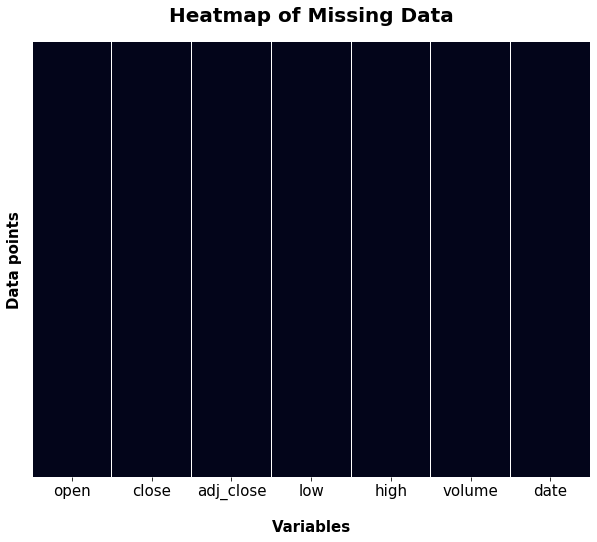

In [14]:
#graphically see the missing data

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(dfp.isna(), cbar=False)
plt.xlabel('Variables', fontsize=15, labelpad=20, fontweight='bold')
plt.ylabel('Data points',  labelpad=10, fontsize=15, fontweight='bold')
plt.title('Heatmap of Missing Data', pad=20, fontsize=20, fontweight='bold')
plt.xticks(fontsize=15);
ax.yaxis.set_ticks(np.arange(0, 100, 100));
#fig.savefig('Heatmap.jpg', bbox_inches='tight')

In [15]:
dfp['hi_low'] = (dfp['high']-dfp['low'])
dfp = pd.DataFrame(dfp,columns=['close','volume','hi_low', 'date'])
print(dfp.shape)
dfp.head()

(20973889, 4)


,close,volume,hi_low,date
ticker,,,,
AHH,11.58,4633900,0.430000,2013-05-08
AHH,11.55,275800,0.160000,2013-05-09
AHH,11.60,277100,0.100000,2013-05-10
AHH,11.65,147400,0.099999,2013-05-13
AHH,11.53,184100,0.100000,2013-05-14


In [16]:
dfp['year'] = pd.DatetimeIndex(dfp['date']).year
dfp.head()

,close,volume,hi_low,date,year
ticker,,,,,
AHH,11.58,4633900,0.430000,2013-05-08,2013
AHH,11.55,275800,0.160000,2013-05-09,2013
AHH,11.60,277100,0.100000,2013-05-10,2013
AHH,11.65,147400,0.099999,2013-05-13,2013
AHH,11.53,184100,0.100000,2013-05-14,2013


In [17]:
def before(x):
    if x <= '2007-12-01':
        return 'before'
    if x >= '2009-07-01':
        return 'after'
    else:
        return 'recession'

In [18]:
dfp['period'] = dfp['date'].apply(before)
dfp.head()

,close,volume,hi_low,date,year,period
ticker,,,,,,
AHH,11.58,4633900,0.430000,2013-05-08,2013,after
AHH,11.55,275800,0.160000,2013-05-09,2013,after
AHH,11.60,277100,0.100000,2013-05-10,2013,after
AHH,11.65,147400,0.099999,2013-05-13,2013,after
AHH,11.53,184100,0.100000,2013-05-14,2013,after


In [19]:
dfp.loc[dfp['date'] == '2008-10-01']

,close,volume,hi_low,date,year,period
ticker,,,,,,
GHDX,22.34,74300,0.869999,2008-10-01,2008,recession
PEZ,19.08,34000,0.180000,2008-10-01,2008,recession
GTN,1.70,90700,0.110000,2008-10-01,2008,recession
FLWS,6.00,78000,0.090000,2008-10-01,2008,recession
MHD,11.74,25500,0.330000,2008-10-01,2008,recession
...,...,...,...,...,...,...
MNTA,13.18,343200,1.070000,2008-10-01,2008,recession
RMBS,12.92,1630300,0.549999,2008-10-01,2008,recession
AKRX,5.11,172400,0.160000,2008-10-01,2008,recession


In [21]:
dfp_97 = dfp.loc[dfp['year'] >= 1997]

In [22]:
std_by_year = dfp_97.groupby(['ticker', 'year'])['close'].std().round(3).unstack()#.fillna(0)#.fillna('-')
std_by_year

year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,7.398,17.272,7.309,5.513,3.488,3.287,3.563,2.027,...,3.698,2.456,4.459,1.933,3.191,1.303,2.395,3.598,6.667,3.241
AA,3.690,2.844,13.393,9.369,8.446,15.288,11.611,5.194,5.253,4.895,...,6.476,3.821,7.372,1.756,1.446,4.951,5.937,3.437,5.910,4.348
AABA,0.945,7.123,14.939,23.657,3.363,1.437,4.210,5.296,2.652,3.840,...,1.616,1.205,1.379,1.312,5.717,5.441,5.632,4.396,10.071,3.529
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.215
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.031,8.226,...,1.514,1.805,1.969,2.270,3.341,5.337,4.483,5.046,3.165,6.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.205,4.589,2.276,3.664,5.985,4.864
ZUMZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.343,3.639,...,2.664,5.114,3.587,6.011,3.162,4.419,8.989,3.236,3.093,2.584
ZUO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.462


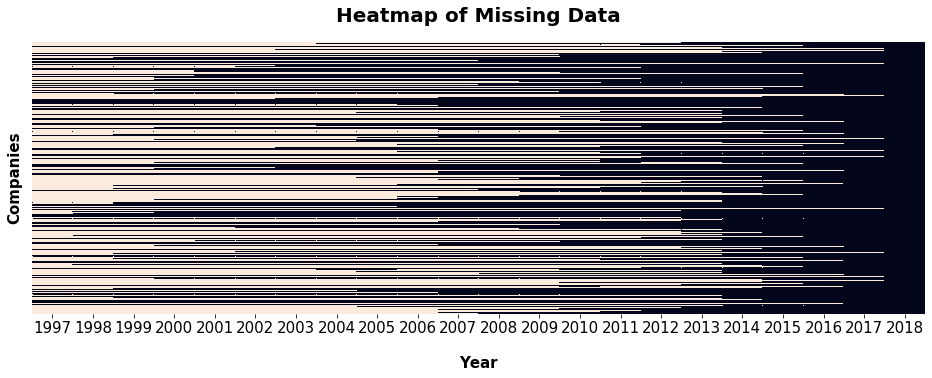

In [27]:
#graphically see the missing data

fig, ax = plt.subplots(figsize=(16, 5))
ax = sns.heatmap(std_by_year.isna(), cbar=False)
plt.xlabel('Year', fontsize=15, labelpad=20, fontweight='bold')
plt.ylabel('Companies',  labelpad=10, fontsize=15, fontweight='bold')
plt.title('Heatmap of Missing Data', pad=20, fontsize=20, fontweight='bold')
plt.xticks(fontsize=15);
ax.yaxis.set_ticks(np.arange(0, 100, 100));
#fig.savefig('Heatmap.jpg', bbox_inches='tight')

In [39]:
std_table = std_by_year.join(df_nyse, on='ticker')
std_table_nyse = std_table.loc[std_table['exchange']=='NYSE']
std_table_nyse

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,name,sector,industry
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,7.398,17.272,7.309,5.513,3.488,3.287,3.563,2.027,...,3.191,1.303,2.395,3.598,6.667,3.241,NYSE,Agilent Technologies Inc,Capital Goods,Biotechnology Laboratory Analytical Instruments
AA,3.690,2.844,13.393,9.369,8.446,15.288,11.611,5.194,5.253,4.895,...,1.446,4.951,5.937,3.437,5.910,4.348,NYSE,Alcoa Corporation,Basic Industries,Aluminum
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.215,NYSE,Aac Holdings Inc,Health Care,Medical Specialities
AAN,0.739,0.142,0.496,0.340,0.317,0.950,1.258,1.937,1.119,1.036,...,0.797,3.253,5.139,2.844,5.446,3.128,NYSE,Aarons Inc,Technology,Diversified Commercial Services
AAP,NaN,NaN,NaN,NaN,0.839,1.721,4.707,1.963,5.005,4.565,...,9.807,11.833,14.837,9.589,28.839,14.786,NYSE,Advance Auto Parts Inc,Consumer Services,Other Specialty Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.384,1.297,2.288,NYSE,Zto Express Cayman Inc,Transportation,Trucking Freight Courier Services
ZTR,1.602,1.529,2.697,0.831,0.870,2.551,1.824,0.453,0.723,1.443,...,0.329,0.259,0.836,0.413,0.739,0.835,NYSE,Virtus Global Dividend And Income Fund Inc,Missing,Missing
ZTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.205,4.589,2.276,3.664,5.985,4.864,NYSE,Zoetis Inc,Health Care,Major Pharmaceuticals


In [40]:
std_table = std_by_year.join(df_nas, on='ticker')
std_table_nas = std_table.loc[std_table['exchange']=='NASDAQ']
std_table_nas

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,name,sector,industry
ticker,,,,,,,,,,,,,,,,,,,,,
AABA,0.945,7.123,14.939,23.657,3.363,1.437,4.210,5.296,2.652,3.840,...,5.717,5.441,5.632,4.396,10.071,3.529,NASDAQ,Altaba Inc,Technology,Edp Services
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.031,8.226,...,3.341,5.337,4.483,5.046,3.165,6.584,NASDAQ,American Airlines Group Inc,Transportation,Air Freight Delivery Services
AAME,0.735,0.322,0.675,0.333,0.291,0.320,0.483,0.145,0.160,0.185,...,0.295,0.193,0.420,0.400,0.227,0.385,NASDAQ,Atlantic American Corporation,Finance,Life Insurance
AAOI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.788,4.631,3.642,4.995,16.311,6.655,NASDAQ,Applied Optoelectronics Inc,Technology,Semiconductors
AAON,0.078,0.101,0.134,0.305,0.416,0.415,0.425,0.380,0.268,0.488,...,3.272,1.512,1.425,3.411,1.601,2.850,NASDAQ,Aaon Inc,Capital Goods,Industrial Machinery Components
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.461,0.884,0.196,0.268,0.504,0.294,NASDAQ,Zynga Inc,Technology,Edp Services
ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.604,NASDAQ,Zscaler Inc,Technology,Edp Services
ZSAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,61.292,12.592,10.436,3.720,NASDAQ,Zosano Pharma Corporation,Health Care,Major Pharmaceuticals


In [38]:
std_table

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,name,sector,industry
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,7.398,17.272,7.309,5.513,3.488,3.287,3.563,2.027,...,3.191,1.303,2.395,3.598,6.667,3.241,NYSE,Agilent Technologies Inc,Capital Goods,Biotechnology Laboratory Analytical Instruments
AA,3.690,2.844,13.393,9.369,8.446,15.288,11.611,5.194,5.253,4.895,...,1.446,4.951,5.937,3.437,5.910,4.348,NYSE,Alcoa Corporation,Basic Industries,Aluminum
AABA,0.945,7.123,14.939,23.657,3.363,1.437,4.210,5.296,2.652,3.840,...,5.717,5.441,5.632,4.396,10.071,3.529,NaN,NaN,NaN,NaN
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.215,NYSE,Aac Holdings Inc,Health Care,Medical Specialities
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.031,8.226,...,3.341,5.337,4.483,5.046,3.165,6.584,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.205,4.589,2.276,3.664,5.985,4.864,NYSE,Zoetis Inc,Health Care,Major Pharmaceuticals
ZUMZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.343,3.639,...,3.162,4.419,8.989,3.236,3.093,2.584,NaN,NaN,NaN,NaN
ZUO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.462,NYSE,Zuora Inc,Technology,Computer Software Prepackaged Software


In [41]:
std_table_nyse.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,name,sector,industry
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,7.398,17.272,7.309,5.513,3.488,3.287,3.563,2.027,...,3.191,1.303,2.395,3.598,6.667,3.241,NYSE,Agilent Technologies Inc,Capital Goods,Biotechnology Laboratory Analytical Instruments
AA,3.690,2.844,13.393,9.369,8.446,15.288,11.611,5.194,5.253,4.895,...,1.446,4.951,5.937,3.437,5.910,4.348,NYSE,Alcoa Corporation,Basic Industries,Aluminum
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.215,NYSE,Aac Holdings Inc,Health Care,Medical Specialities
AAN,0.739,0.142,0.496,0.340,0.317,0.950,1.258,1.937,1.119,1.036,...,0.797,3.253,5.139,2.844,5.446,3.128,NYSE,Aarons Inc,Technology,Diversified Commercial Services
AAP,NaN,NaN,NaN,NaN,0.839,1.721,4.707,1.963,5.005,4.565,...,9.807,11.833,14.837,9.589,28.839,14.786,NYSE,Advance Auto Parts Inc,Consumer Services,Other Specialty Stores


In [43]:
std_table_nas.tail()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,name,sector,industry
ticker,,,,,,,,,,,,,,,,,,,,,
ZNGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.461,0.884,0.196,0.268,0.504,0.294,NASDAQ,Zynga Inc,Technology,Edp Services
ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.604,NASDAQ,Zscaler Inc,Technology,Edp Services
ZSAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,61.292,12.592,10.436,3.720,NASDAQ,Zosano Pharma Corporation,Health Care,Major Pharmaceuticals
ZUMZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.343,3.639,...,3.162,4.419,8.989,3.236,3.093,2.584,NASDAQ,Zumiez Inc,Consumer Services,Clothing Shoe Accessory Stores
ZYNE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.858,2.834,5.450,1.732,NASDAQ,Zynerba Pharmaceuticals Inc,Health Care,Major Pharmaceuticals


In [46]:
avgp_by_year = dfp_97.groupby(['ticker', 'year'])['close'].mean().round(3).unstack()#.fillna(0)#.fillna('-')
avgp_by_year.head()
#s.pct_change()

year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,34.581,49.877,23.912,16.414,14.479,19.227,19.357,24.178,...,15.644,23.265,29.605,28.595,33.461,40.621,39.602,43.370,59.330,66.917
AA,44.653,42.839,68.950,76.104,88.884,71.484,62.596,79.271,67.260,72.573,...,26.007,30.687,33.523,21.962,20.658,34.726,28.055,23.834,38.302,48.524
AABA,2.087,11.319,45.223,59.967,9.188,7.594,15.331,29.807,35.418,29.954,...,14.870,15.589,15.592,15.997,27.743,39.444,38.972,37.618,56.492,74.460
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.273
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.069,44.322,...,3.830,8.637,7.460,10.496,18.188,38.924,45.122,38.184,47.491,46.213


In [47]:
ret_by_year = avgp_by_year.pct_change(axis='columns').round(3)
ret_by_year.head()

year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,NaN,0.442,-0.521,-0.314,-0.118,0.328,0.007,0.249,...,-0.275,0.487,0.273,-0.034,0.170,0.214,-0.025,0.095,0.368,0.128
AA,NaN,-0.041,0.610,0.104,0.168,-0.196,-0.124,0.266,-0.152,0.079,...,-0.622,0.180,0.092,-0.345,-0.059,0.681,-0.192,-0.150,0.607,0.267
AABA,NaN,4.424,2.995,0.326,-0.847,-0.173,1.019,0.944,0.188,-0.154,...,-0.297,0.048,0.000,0.026,0.734,0.422,-0.012,-0.035,0.502,0.318
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.525,...,-0.505,1.255,-0.136,0.407,0.733,1.140,0.159,-0.154,0.244,-0.027


In [51]:
ret_table_nas = ret_by_year.join(df_nas, on='ticker')
ret_table_nas = ret_table_nas.loc[ret_table_nas['exchange']=='NASDAQ']
ret_table_nas

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,name,sector,industry
ticker,,,,,,,,,,,,,,,,,,,,,
AABA,NaN,4.424,2.995,0.326,-0.847,-0.173,1.019,0.944,0.188,-0.154,...,0.734,0.422,-0.012,-0.035,0.502,0.318,NASDAQ,Altaba Inc,Technology,Edp Services
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.525,...,0.733,1.140,0.159,-0.154,0.244,-0.027,NASDAQ,American Airlines Group Inc,Transportation,Air Freight Delivery Services
AAME,NaN,0.276,-0.207,-0.330,-0.277,0.207,0.045,0.336,-0.013,-0.039,...,0.376,0.037,0.039,-0.009,-0.088,-0.177,NASDAQ,Atlantic American Corporation,Finance,Life Insurance
AAOI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.431,-0.106,0.015,2.236,-0.334,NASDAQ,Applied Optoelectronics Inc,Technology,Semiconductors
AAON,NaN,0.274,0.254,0.787,0.178,0.570,-0.030,0.083,-0.069,0.374,...,0.709,0.334,0.140,0.203,0.283,0.012,NASDAQ,Aaon Inc,Capital Goods,Industrial Machinery Components
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.483,0.031,-0.237,-0.009,0.310,0.139,NASDAQ,Zynga Inc,Technology,Edp Services
ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NASDAQ,Zscaler Inc,Technology,Edp Services
ZSAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.826,-0.019,-0.748,NASDAQ,Zosano Pharma Corporation,Health Care,Major Pharmaceuticals


In [160]:
avg_table_nas = avgp_by_year.join(df_nas, on='ticker')
avg_table_nas = avg_table_nas.loc[avg_table_nas['exchange']=='NASDAQ']
avg_table_nas

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,name,sector,industry
ticker,,,,,,,,,,,,,,,,,,,,,
AABA,2.087,11.319,45.223,59.967,9.188,7.594,15.331,29.807,35.418,29.954,...,27.743,39.444,38.972,37.618,56.492,74.460,NASDAQ,Altaba Inc,Technology,Edp Services
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.069,44.322,...,18.188,38.924,45.122,38.184,47.491,46.213,NASDAQ,American Airlines Group Inc,Transportation,Air Freight Delivery Services
AAME,3.599,4.591,3.640,2.440,1.764,2.129,2.225,2.972,2.933,2.820,...,3.719,3.857,4.009,3.971,3.623,2.980,NASDAQ,Atlantic American Corporation,Finance,Life Insurance
AAOI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.677,18.139,16.209,16.446,53.217,35.447,NASDAQ,Applied Optoelectronics Inc,Technology,Semiconductors
AAON,0.653,0.832,1.043,1.864,2.196,3.448,3.344,3.622,3.371,4.632,...,14.905,19.878,22.659,27.268,34.993,35.399,NASDAQ,Aaon Inc,Capital Goods,Industrial Machinery Components
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.319,3.423,2.612,2.589,3.391,3.864,NASDAQ,Zynga Inc,Technology,Edp Services
ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.316,NASDAQ,Zscaler Inc,Technology,Edp Services
ZSAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,145.449,25.270,24.780,6.250,NASDAQ,Zosano Pharma Corporation,Health Care,Major Pharmaceuticals


In [161]:
avg_table_nyse = avgp_by_year.join(df_nyse, on='ticker')
avg_table_nyse = avg_table_nyse.loc[avg_table_nyse['exchange']=='NYSE']
avg_table_nyse

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,name,sector,industry
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,34.581,49.877,23.912,16.414,14.479,19.227,19.357,24.178,...,33.461,40.621,39.602,43.370,59.330,66.917,NYSE,Agilent Technologies Inc,Capital Goods,Biotechnology Laboratory Analytical Instruments
AA,44.653,42.839,68.950,76.104,88.884,71.484,62.596,79.271,67.260,72.573,...,20.658,34.726,28.055,23.834,38.302,48.524,NYSE,Alcoa Corporation,Basic Industries,Aluminum
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.273,NYSE,Aac Holdings Inc,Health Care,Medical Specialities
AAN,4.024,5.096,4.671,4.789,4.513,6.487,7.408,11.998,13.098,15.441,...,28.510,28.896,32.270,24.926,36.578,43.959,NYSE,Aarons Inc,Technology,Diversified Commercial Services
AAP,NaN,NaN,NaN,NaN,14.487,16.902,20.481,26.644,38.069,36.863,...,85.210,130.941,163.647,155.488,122.575,124.564,NYSE,Advance Auto Parts Inc,Consumer Services,Other Specialty Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.400,14.239,17.672,NYSE,Zto Express Cayman Inc,Transportation,Trucking Freight Courier Services
ZTR,35.476,35.852,32.361,26.723,28.707,25.775,21.603,20.702,20.321,20.315,...,13.100,13.977,12.877,11.856,12.524,11.658,NYSE,Virtus Global Dividend And Income Fund Inc,Missing,Missing
ZTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.885,34.062,46.101,47.834,61.130,83.206,NYSE,Zoetis Inc,Health Care,Major Pharmaceuticals


In [159]:
# sharpe_function_exchange(test_ret, risk_free_before, std_per)

In [111]:
risk_free_before = .0396
risk_free_during = .0115
risk_free_after = .006

In [112]:
# def sharpe_function_exchange(average_return, risk_free_rate, standard_dev):
#     sharpe = (average_return-risk_free_rate)/standard_dev
#     return sharpe

In [ ]:
# def sharpe_func(ret_data_frame, year, stock, std_data_frame, avg_data_frame):
#     func_retn = data_frame[year][stock]
#     func_std = std_data_frame[year][stock]
#     fund_per = func_std / avg_data_frame[stock][year]

In [115]:
standard_percents = std_table / avgp_by_year
standard_percents

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,industry,name,sector
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,0.213933,0.346292,0.305662,0.335872,0.240901,0.170958,0.184068,0.083837,...,0.095365,0.032077,0.060477,0.082961,0.112371,0.048433,NaN,NaN,NaN,NaN
AA,0.082637,0.066388,0.194242,0.123108,0.095023,0.213866,0.185491,0.065522,0.078100,0.067449,...,0.069997,0.142573,0.211620,0.144206,0.154300,0.089605,NaN,NaN,NaN,NaN
AABA,0.452803,0.629296,0.330341,0.394500,0.366021,0.189228,0.274607,0.177676,0.074877,0.128197,...,0.206070,0.137942,0.144514,0.116859,0.178273,0.047395,NaN,NaN,NaN,NaN
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.118271,NaN,NaN,NaN,NaN
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.207472,0.185596,...,0.183693,0.137113,0.099353,0.132150,0.066644,0.142471,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.037792,0.134725,0.049370,0.076598,0.097906,0.058457,NaN,NaN,NaN,NaN
ZUMZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142883,0.125730,...,0.117577,0.155342,0.333272,0.174175,0.183137,0.109780,NaN,NaN,NaN,NaN
ZUO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.178031,NaN,NaN,NaN,NaN


In [117]:
sharpe_table = (ret_by_year - risk_free_before) / standard_percents

In [156]:
sharpe_table

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,industry,name,sector
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,NaN,1.162026,-1.834049,-1.052783,-0.654212,1.686969,-0.177109,2.497717,...,1.367382,5.436917,-1.068179,0.667787,2.922450,1.825197,NaN,NaN,NaN,NaN
AA,NaN,-1.214073,2.936540,0.523119,1.351256,-1.101624,-0.881983,3.455324,-2.453268,0.584142,...,-1.408630,4.498739,-1.094414,-1.314788,3.677251,2.537801,NaN,NaN,NaN,NaN
AABA,NaN,6.967152,8.946519,0.725982,-2.422266,-1.123510,3.566551,5.090153,1.981912,-1.510181,...,3.369729,2.772172,-0.357059,-0.638376,2.593774,5.874090,NaN,NaN,NaN,NaN
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.615354,...,3.774786,8.025477,1.201777,-1.465006,3.067033,-0.467464,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.210800,6.348002,-0.020888,2.434986,5.498028,NaN,NaN,NaN,NaN
ZUMZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.769511,...,-1.425448,0.118449,-0.274851,-2.012916,-0.713128,3.228277,NaN,NaN,NaN,NaN
ZUO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
sharpe_table[1997].mean()
sharpe_table[1998].mean()
sharpe_table[1999].mean()
sharpe_table[2000].mean()
sharpe_table[2001].mean()
sharpe_table[2002].mean()
sharpe_table[2003].mean()
sharpe_table[2004].mean()
sharpe_table[2005].mean()
sharpe_table[2006].mean()
sharpe_table[2007].mean()
sharpe_table[2008].mean()
sharpe_table[2009].mean()
sharpe_table[2010].mean()
sharpe_table[2011].mean()
sharpe_table[2012].mean()
sharpe_table[2013].mean()
sharpe_table[2014].mean()
sharpe_table[2015].mean()
sharpe_table[2016].mean()
sharpe_table[2017].mean()
sharpe_table[2018].mean()



-inf

In [310]:
sharpe_table = sharpe_table.drop(columns=['exchange', 'industry', 'name', 'sector'])

In [326]:
sharpe_table.mean()

1997         NaN
1998    0.694294
1999   -0.520048
2000    0.068529
2001    0.463234
2002        -inf
2003        -inf
2004        -inf
2005        -inf
2006        -inf
2007    0.628239
2008   -1.076342
2009   -0.801746
2010        -inf
2011    0.733030
2012        -inf
2013        -inf
2014        -inf
2015    9.759980
2016        -inf
2017    9.400341
2018        -inf
dtype: float64

In [328]:
sharpe_table.replace([np.inf, -np.inf], np.nan).mean()

1997          NaN
1998     0.694294
1999    -0.520048
2000     0.068529
2001     0.463234
2002     0.431088
2003     0.381952
2004     2.492396
2005     0.704739
2006     0.766908
2007     0.628239
2008    -1.076342
2009    -0.801746
2010    37.591989
2011     0.733030
2012     3.133844
2013     1.237393
2014    16.370844
2015     9.759980
2016    35.564841
2017     9.400341
2018    39.954306
dtype: float64

In [331]:
sharpe_table_nyse = sharpe_table.join(df_nyse, on='ticker')
sharpe_table_nyse = sharpe_table_nyse.loc[sharpe_table_nyse['exchange']=='NYSE']
sharpe_table_nyse.mean()
sharpe_table_nyse.replace([np.inf, -np.inf], np.nan).mean()

1997          NaN
1998     0.776688
1999    -0.718002
2000    -0.521066
2001     1.060874
2002     0.288522
2003    -0.044401
2004     2.483740
2005     0.981457
2006     0.802541
2007     0.808907
2008    -1.014326
2009    -0.271284
2010    67.739067
2011     0.797297
2012     0.550940
2013     1.373202
2014    28.567195
2015    15.829080
2016    69.338646
2017    15.574091
2018    66.868089
dtype: float64

In [323]:
sharpe_table_nas = sharpe_table.join(df_nas, on='ticker')
sharpe_table_nas = sharpe_table_nas.loc[sharpe_table_nas['exchange']=='NASDAQ']
sharpe_table_nas.mean()

1997         NaN
1998    0.586035
1999   -0.267003
2000    0.758712
2001   -0.206166
2002        -inf
2003        -inf
2004        -inf
2005        -inf
2006        -inf
2007    0.429190
2008   -1.143155
2009   -1.361732
2010    5.814361
2011    0.667070
2012    5.761066
2013        -inf
2014        -inf
2015    3.875186
2016    4.694191
2017    3.917092
2018        -inf
dtype: float64

In [52]:
ret_table_nyse = ret_by_year.join(df_nyse, on='ticker')
ret_table_nyse = ret_table_nyse.loc[ret_table_nyse['exchange']=='NYSE']
ret_table_nyse

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,name,sector,industry
ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,NaN,0.442,-0.521,-0.314,-0.118,0.328,0.007,0.249,...,0.170,0.214,-0.025,0.095,0.368,0.128,NYSE,Agilent Technologies Inc,Capital Goods,Biotechnology Laboratory Analytical Instruments
AA,NaN,-0.041,0.610,0.104,0.168,-0.196,-0.124,0.266,-0.152,0.079,...,-0.059,0.681,-0.192,-0.150,0.607,0.267,NYSE,Alcoa Corporation,Basic Industries,Aluminum
AAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NYSE,Aac Holdings Inc,Health Care,Medical Specialities
AAN,NaN,0.266,-0.083,0.025,-0.058,0.437,0.142,0.620,0.092,0.179,...,0.026,0.014,0.117,-0.228,0.467,0.202,NYSE,Aarons Inc,Technology,Diversified Commercial Services
AAP,NaN,NaN,NaN,NaN,NaN,0.167,0.212,0.301,0.429,-0.032,...,0.120,0.537,0.250,-0.050,-0.212,0.016,NYSE,Advance Auto Parts Inc,Consumer Services,Other Specialty Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.011,0.241,NYSE,Zto Express Cayman Inc,Transportation,Trucking Freight Courier Services
ZTR,NaN,0.011,-0.097,-0.174,0.074,-0.102,-0.162,-0.042,-0.018,-0.000,...,0.046,0.067,-0.079,-0.079,0.056,-0.069,NYSE,Virtus Global Dividend And Income Fund Inc,Missing,Missing
ZTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.068,0.353,0.038,0.278,0.361,NYSE,Zoetis Inc,Health Care,Major Pharmaceuticals


In [219]:
std_table_nas

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,name,sector,industry
ticker,,,,,,,,,,,,,,,,,,,,,
AABA,0.945,7.123,14.939,23.657,3.363,1.437,4.210,5.296,2.652,3.840,...,5.717,5.441,5.632,4.396,10.071,3.529,NASDAQ,Altaba Inc,Technology,Edp Services
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.031,8.226,...,3.341,5.337,4.483,5.046,3.165,6.584,NASDAQ,American Airlines Group Inc,Transportation,Air Freight Delivery Services
AAME,0.735,0.322,0.675,0.333,0.291,0.320,0.483,0.145,0.160,0.185,...,0.295,0.193,0.420,0.400,0.227,0.385,NASDAQ,Atlantic American Corporation,Finance,Life Insurance
AAOI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.788,4.631,3.642,4.995,16.311,6.655,NASDAQ,Applied Optoelectronics Inc,Technology,Semiconductors
AAON,0.078,0.101,0.134,0.305,0.416,0.415,0.425,0.380,0.268,0.488,...,3.272,1.512,1.425,3.411,1.601,2.850,NASDAQ,Aaon Inc,Capital Goods,Industrial Machinery Components
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.461,0.884,0.196,0.268,0.504,0.294,NASDAQ,Zynga Inc,Technology,Edp Services
ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.604,NASDAQ,Zscaler Inc,Technology,Edp Services
ZSAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,61.292,12.592,10.436,3.720,NASDAQ,Zosano Pharma Corporation,Health Care,Major Pharmaceuticals


In [220]:
ret_table_nas

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,exchange,name,sector,industry
ticker,,,,,,,,,,,,,,,,,,,,,
AABA,NaN,4.424,2.995,0.326,-0.847,-0.173,1.019,0.944,0.188,-0.154,...,0.734,0.422,-0.012,-0.035,0.502,0.318,NASDAQ,Altaba Inc,Technology,Edp Services
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.525,...,0.733,1.140,0.159,-0.154,0.244,-0.027,NASDAQ,American Airlines Group Inc,Transportation,Air Freight Delivery Services
AAME,NaN,0.276,-0.207,-0.330,-0.277,0.207,0.045,0.336,-0.013,-0.039,...,0.376,0.037,0.039,-0.009,-0.088,-0.177,NASDAQ,Atlantic American Corporation,Finance,Life Insurance
AAOI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.431,-0.106,0.015,2.236,-0.334,NASDAQ,Applied Optoelectronics Inc,Technology,Semiconductors
AAON,NaN,0.274,0.254,0.787,0.178,0.570,-0.030,0.083,-0.069,0.374,...,0.709,0.334,0.140,0.203,0.283,0.012,NASDAQ,Aaon Inc,Capital Goods,Industrial Machinery Components
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.483,0.031,-0.237,-0.009,0.310,0.139,NASDAQ,Zynga Inc,Technology,Edp Services
ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NASDAQ,Zscaler Inc,Technology,Edp Services
ZSAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.826,-0.019,-0.748,NASDAQ,Zosano Pharma Corporation,Health Care,Major Pharmaceuticals


In [333]:
standard_nas_per97 = std_table_nas[1997] / avg_table_nas[1997]
standard_nas_per97
new_snp = standard_nas_per97.dropna()
new_snp.mean()


standard_nas_per98 = std_table_nas[1998] / avg_table_nas[1998]
standard_nas_per98
new_snp_98 = standard_nas_per98.dropna()
new_snp_98.mean()

standard_nas_per99 = std_table_nas[1999] / avg_table_nas[1999]
standard_nas_per99
new_snp_99 = standard_nas_per99.dropna()
new_snp_99.mean()

standard_nas_per20 = std_table_nas[2000] / avg_table_nas[2000]
standard_nas_per20
new_snp_20 = standard_nas_per20.dropna()
new_snp_20.mean()

standard_nas_per01 = std_table_nas[2001] / avg_table_nas[2001]
standard_nas_per01
new_snp_01 = standard_nas_per01.dropna()
new_snp_01.mean()

standard_nas_per02 = std_table_nas[2002] / avg_table_nas[2002]
standard_nas_per02
new_snp_02 = standard_nas_per02.dropna()
new_snp_02.mean()

standard_nas_per03 = std_table_nas[2003] / avg_table_nas[2003]
standard_nas_per03
new_snp_03 = standard_nas_per03.dropna()
new_snp_03.mean()

standard_nas_per04 = std_table_nas[2004] / avg_table_nas[2004]
standard_nas_per04
new_snp_04 = standard_nas_per04.dropna()
new_snp_04.mean()

standard_nas_per05 = std_table_nas[2005] / avg_table_nas[2005]
standard_nas_per05
new_snp_05 = standard_nas_per05.dropna()
new_snp_05.mean()

standard_nas_per06 = std_table_nas[2006] / avg_table_nas[2006]
standard_nas_per06
new_snp_06 = standard_nas_per06.dropna()
new_snp_06.mean()

standard_nas_per07 = std_table_nas[2007] / avg_table_nas[2007]
standard_nas_per07
new_snp_07 = standard_nas_per07.dropna()
new_snp_07.mean()

nas_sharpe_avg_before = (new_snp.mean() + new_snp_98.mean()  + new_snp_99.mean() + new_snp_20.mean() 
                         + new_snp_01.mean() + new_snp_02.mean() + new_snp_03.mean() + new_snp_04.mean() 
                         + new_snp_05.mean() + new_snp_06.mean() + new_snp_07.mean()) / 11




standard_nas_per08 = std_table_nas[2008] / avg_table_nas[2008]
standard_nas_per08
new_snp_08 = standard_nas_per08.dropna()
new_snp_08.mean()

standard_nas_per09 = std_table_nas[2009] / avg_table_nas[2009]
standard_nas_per09
new_snp_09 = standard_nas_per09.dropna()
new_snp_09.mean()



nas_sharpe_avg_during = (new_snp_08.mean() + new_snp_09.mean()) / 2


standard_nas_per10 = std_table_nas[2010] / avg_table_nas[2010]
standard_nas_per10
new_snp_10 = standard_nas_per10.dropna()
new_snp_10.mean()

standard_nas_per11 = std_table_nas[2011] / avg_table_nas[2011]
standard_nas_per11
new_snp_11 = standard_nas_per11.dropna()
new_snp_11.mean()

standard_nas_per12 = std_table_nas[2012] / avg_table_nas[2012]
standard_nas_per12
new_snp_12 = standard_nas_per12.dropna()
new_snp_12.mean()

standard_nas_per13 = std_table_nas[2013] / avg_table_nas[2013]
standard_nas_per13
new_snp_13 = standard_nas_per13.dropna()
new_snp_13.mean()

standard_nas_per14 = std_table_nas[2014] / avg_table_nas[2014]
standard_nas_per14
new_snp_14 = standard_nas_per14.dropna()
new_snp_14.mean()

standard_nas_per15 = std_table_nas[2015] / avg_table_nas[2015]
standard_nas_per15
new_snp_15 = standard_nas_per15.dropna()
new_snp_15.mean()

standard_nas_per16 = std_table_nas[2016] / avg_table_nas[2016]
standard_nas_per16
new_snp_16 = standard_nas_per16.dropna()
new_snp_16.mean()

standard_nas_per17 = std_table_nas[2017] / avg_table_nas[2017]
standard_nas_per17
new_snp_17 = standard_nas_per17.dropna()
new_snp_17.mean()

standard_nas_per18 = std_table_nas[2018] / avg_table_nas[2018]
standard_nas_per18
new_snp_18 = standard_nas_per18.dropna()
new_snp_18.mean()

nas_sharpe_avg_after = (new_snp_10.mean() + new_snp_11.mean() + new_snp_12.mean() + new_snp_13.mean() 
                       + new_snp_14.mean() + new_snp_15.mean() + new_snp_16.mean() + new_snp_17.mean()
                       + new_snp_18.mean()) / 9

# standard_nas_per98 = std_table_nas[1998] / avg_table_nas[1998]
# standard_nas_per98
# new_snp_98 = standard_nas_per98.dropna()
# new_snp_98.mean()




# def thing_func(std_tbl, avg_tbl):
#     for thing in std_tbl:
#         standard_perc = std_tbl / avg_tbl
#         new_stan = standard_perc.dropna()
        

In [288]:
# print(nas_sharpe_avg_before)
# print(nas_sharpe_avg_during)
# nas_sharpe_avg_after

0.19294778314290068
0.2506208978321003


0.15371236603759436

In [337]:
standard_nyse_per97 = std_table_nyse[1997] / avg_table_nyse[1997]
standard_nyse_per97
new_snpy = standard_nyse_per97.dropna()
new_snpy.mean()


standard_nyse_per98 = std_table_nyse[1998] / avg_table_nyse[1998]
standard_nyse_per98
new_snpy_98 = standard_nyse_per98.dropna()
new_snpy_98.mean()

standard_nyse_per99 = std_table_nyse[1999] / avg_table_nyse[1999]
standard_nyse_per99
new_snpy_99 = standard_nyse_per99.dropna()
new_snpy_99.mean()

standard_nyse_per20 = std_table_nyse[2000] / avg_table_nyse[2000]
standard_nyse_per20
new_snpy_20 = standard_nyse_per20.dropna()
new_snpy_20.mean()

standard_nyse_per01 = std_table_nyse[2001] / avg_table_nyse[2001]
standard_nyse_per01
new_snpy_01 = standard_nyse_per01.dropna()
new_snpy_01.mean()

standard_nyse_per02 = std_table_nyse[2002] / avg_table_nyse[2002]
standard_nyse_per02
new_snpy_02 = standard_nyse_per02.dropna()
new_snpy_02.mean()

standard_nyse_per03 = std_table_nyse[2003] / avg_table_nyse[2003]
standard_nyse_per03
new_snpy_03 = standard_nyse_per98.dropna()
new_snpy_03.mean()

standard_nyse_per04 = std_table_nyse[2004] / avg_table_nyse[2004]
standard_nyse_per04
new_snpy_04 = standard_nyse_per04.dropna()
new_snpy_04.mean()

standard_nyse_per05 = std_table_nyse[2005] / avg_table_nyse[2005]
standard_nyse_per05
new_snpy_05 = standard_nyse_per05.dropna()
new_snpy_05.mean()

standard_nyse_per06 = std_table_nyse[2006] / avg_table_nyse[2006]
standard_nyse_per06
new_snpy_06 = standard_nyse_per06.dropna()
new_snpy_06.mean()

standard_nyse_per07 = std_table_nyse[2007] / avg_table_nyse[2007]
standard_nyse_per07
new_snpy_07 = standard_nyse_per07.dropna()
new_snpy_07.mean()

standard_nyse_per08 = std_table_nyse[2008] / avg_table_nyse[2008]
standard_nyse_per08
new_snpy_08 = standard_nyse_per08.dropna()
new_snpy_08.mean()

standard_nyse_per09 = std_table_nyse[2009] / avg_table_nyse[2009]
standard_nyse_per09
new_snpy_09 = standard_nyse_per09.dropna()
new_snpy_09.mean()

standard_nyse_per10 = std_table_nyse[2010] / avg_table_nyse[2010]
standard_nyse_per10
new_snpy_10 = standard_nyse_per10.dropna()
new_snpy_10.mean()

standard_nyse_per11 = std_table_nyse[2011] / avg_table_nyse[2011]
standard_nyse_per11
new_snpy_11 = standard_nyse_per11.dropna()
new_snpy_11.mean()

standard_nyse_per12 = std_table_nyse[2012] / avg_table_nyse[2012]
standard_nyse_per12
new_snpy_12 = standard_nyse_per12.dropna()
new_snpy_12.mean()

standard_nyse_per13 = std_table_nyse[2013] / avg_table_nyse[2013]
standard_nyse_per13
new_snpy_13 = standard_nyse_per13.dropna()
new_snpy_13.mean()

standard_nyse_per14 = std_table_nyse[2014] / avg_table_nyse[2014]
standard_nyse_per14
new_snpy_14 = standard_nyse_per14.dropna()
new_snpy_14.mean()

standard_nyse_per15 = std_table_nyse[2015] / avg_table_nyse[2015]
standard_nyse_per15
new_snpy_15 = standard_nyse_per15.dropna()
new_snpy_15.mean()

standard_nyse_per16 = std_table_nyse[2016] / avg_table_nyse[2016]
standard_nyse_per16
new_snpy_16 = standard_nyse_per16.dropna()
new_snpy_16.mean()

standard_nyse_per17 = std_table_nyse[2017] / avg_table_nyse[2017]
standard_nyse_per17
new_snpy_17 = standard_nyse_per17.dropna()
new_snpy_17.mean()

standard_nyse_per18 = std_table_nyse[2018] / avg_table_nyse[2018]
standard_nyse_per18
new_snpy_18 = standard_nyse_per18.dropna()
new_snpy_18.mean()

0.08525416003828405

In [332]:
# thing_func(std_table_nas, avg_table_nas)

In [334]:
# nas_list = []
# for ting in range(1997,2019):
#     nas_sh = (ret_table_nas[ting] - risk_free_before) / standard_nas_per[ting]
#     sharpe_df_nas = pd.DataFrame(nas_sh).dropna()
#     sharpe_nas_mean = sharpe_df_nas.mean()
#     print (sharpe_df_nas)
    

In [335]:
# a = sharpe_df_nas.groupby('ticker')['year']

In [336]:
# a